In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, f1_score, make_scorer, precision_score
from time import perf_counter 
import seaborn as sns
import os

In [56]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [58]:
# loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 69079 files belonging to 37 classes.


In [130]:
import os, os.path

# simple version for working with CWD
print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

# path joining version for other paths
DIR = './dataset/train/Cherry___Powdery_mildew/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

12
1683


In [131]:
for i in class_names:
    # simple version for working with CWD
    print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

    # path joining version for other paths
    DIR = f'./dataset/train/{i}/'
    print(i)
    print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

12
Apple___Black_rot
1987
12
Apple___Cedar_apple_rust
1760
12
Apple___healthy
2510
12
Blueberry___healthy
1816
12
Cherry___Powdery_mildew
1683
12
Cherry___healthy
1826
12
Corn___Cercospora_leaf_spot Gray_leaf_spot
1642
12
Corn___Common_rust_
1907
12
Corn___Northern_Leaf_Blight
1908
12
Corn___healthy
1859
12
Grape___Black_rot
2360
12
Grape___Esca
2400
12
Grape___Leaf_blight
2152
12
Grape___healthy
2115
12
Orange___Haunglongbing
503
12
Peach___Bacterial_spot
1838
12
Peach___healthy
1728
12
Pepperbell___Bacterial_spot
1913
12
Pepperbell___healthy
1988
12
Potato___Early_blight
1939
12
Potato___Late_blight
1939
12
Potato___healthy
1824
12
Raspberry___healthy
1781
12
Soybean___healthy
2022
12
Squash___Powdery_mildew
1736
12
Strawberry___Leaf_scorch
1774
12
Strawberry___healthy
1824
12
Tomato___Bacterial_spot
1702
12
Tomato___Early_blight
1920
12
Tomato___Late_blight
1851
12
Tomato___Leaf_Mold
1882
12
Tomato___Septoria_leaf_spot
1745
12
Tomato___Spider_mites Two-spotted_spider_mite
1741
12
To

In [59]:
# loading training set
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './dataset/valid/',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 17068 files belonging to 37 classes.


In [129]:
class_names = training_ds.class_names
print(class_names)

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


'Tomato___Bacterial_spot'

In [10]:
class_names = validation_ds.class_names
print(class_names)

['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust_', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca', 'Grape___Leaf_blight', 'Grape___healthy', 'Orange___Haunglongbing', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepperbell___Bacterial_spot', 'Pepperbell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


0
1
2
3
4
5
6
7
8


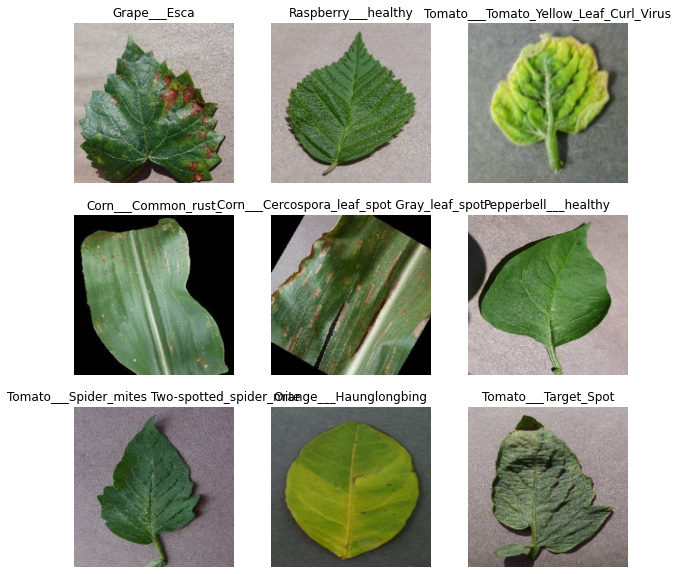

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in validation_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        print(i)
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [22]:
# ## Defining Cnn
# classifier = tf.keras.models.Sequential([
#   layers.BatchNormalization(),
#   layers.Conv2D(32, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(256, activation='relu'),
#   layers.Dense(len(class_names), activation= 'softmax')
# ])

In [26]:
# classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
# ## lets train our CNN
# retVal = classifier.fit(training_ds, validation_data= validation_ds, epochs = 20)

# App model

In [67]:
image_size = 250

model0 = tf.keras.models.Sequential([
  layers.Conv2D(32, 3, activation='relu',input_shape=(image_size, image_size, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(len(class_names), activation= 'softmax')
])

early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history0 = model0.fit(training_ds, validation_data = validation_ds, batch_size = 32, epochs = 10, callbacks = [early])

Epoch 1/10
691/691 [==============================] - 4668s 7s/step - loss: 20.6775 - accuracy: 0.1890 - val_loss: 1.3404 - val_accuracy: 0.6151
Epoch 2/10
691/691 [==============================] - 5564s 8s/step - loss: 1.1329 - accuracy: 0.6637 - val_loss: 0.6592 - val_accuracy: 0.8059
Epoch 3/10
691/691 [==============================] - 6001s 9s/step - loss: 0.6017 - accuracy: 0.8145 - val_loss: 0.4762 - val_accuracy: 0.8558
Epoch 4/10
691/691 [==============================] - 5951s 9s/step - loss: 0.3879 - accuracy: 0.8776 - val_loss: 0.3888 - val_accuracy: 0.8809
Epoch 5/10
691/691 [==============================] - 5406s 8s/step - loss: 0.2978 - accuracy: 0.9052 - val_loss: 0.4181 - val_accuracy: 0.8763
Epoch 6/10
691/691 [==============================] - 5458s 8s/step - loss: 0.2585 - accuracy: 0.9218 - val_loss: 0.3862 - val_accuracy: 0.8918
Epoch 7/10
691/691 [==============================] - 5435s 8s/step - loss: 0.2032 - accuracy: 0.9372 - val_loss: 0.4307 - val_accuracy

In [69]:
model0.save('./models/model0.h5')

In [91]:
model0.save('./models/my_model0')

INFO:tensorflow:Assets written to: ./models/my_model0\assets


In [110]:
image_path = './dataset/train/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_270deg.JPG'

In [ ]:
class_names[27]

In [115]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

image = load_img(image_path,target_size=(250,250))
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,axis=0)
result = model0.predict(image)
result1 = np.argmax(result)
np.round(result,10000)
print(result)

[[1.99172955e-05 1.95416203e-03 2.72217294e-04 6.61651120e-06
  9.75628354e-05 2.25623330e-06 7.09428173e-03 3.46801430e-03
  5.06394655e-02 1.82637930e-01 7.58648675e-04 1.46585971e-05
  1.84601359e-03 3.82199680e-04 1.12541580e-04 9.85813094e-04
  3.99236815e-05 1.02320279e-03 1.31347824e-05 1.13586844e-04
  3.83855309e-04 7.34189416e-06 2.70401069e-05 6.21032523e-05
  5.65891096e-04 9.92538698e-05 1.65920721e-06 9.81982914e-04
  7.79112394e-04 7.44404495e-01 3.33250035e-04 4.30757973e-05
  1.11653950e-04 2.39292058e-06 1.91232830e-05 5.55711333e-04
  1.39996031e-04]]


C:\Users\jesse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:58: RuntimeWarning: invalid value encountered in true_divide
  return bound(*args, **kwds)


In [119]:
result[29]

IndexError: index 29 is out of bounds for axis 0 with size 1

In [118]:
result1

29

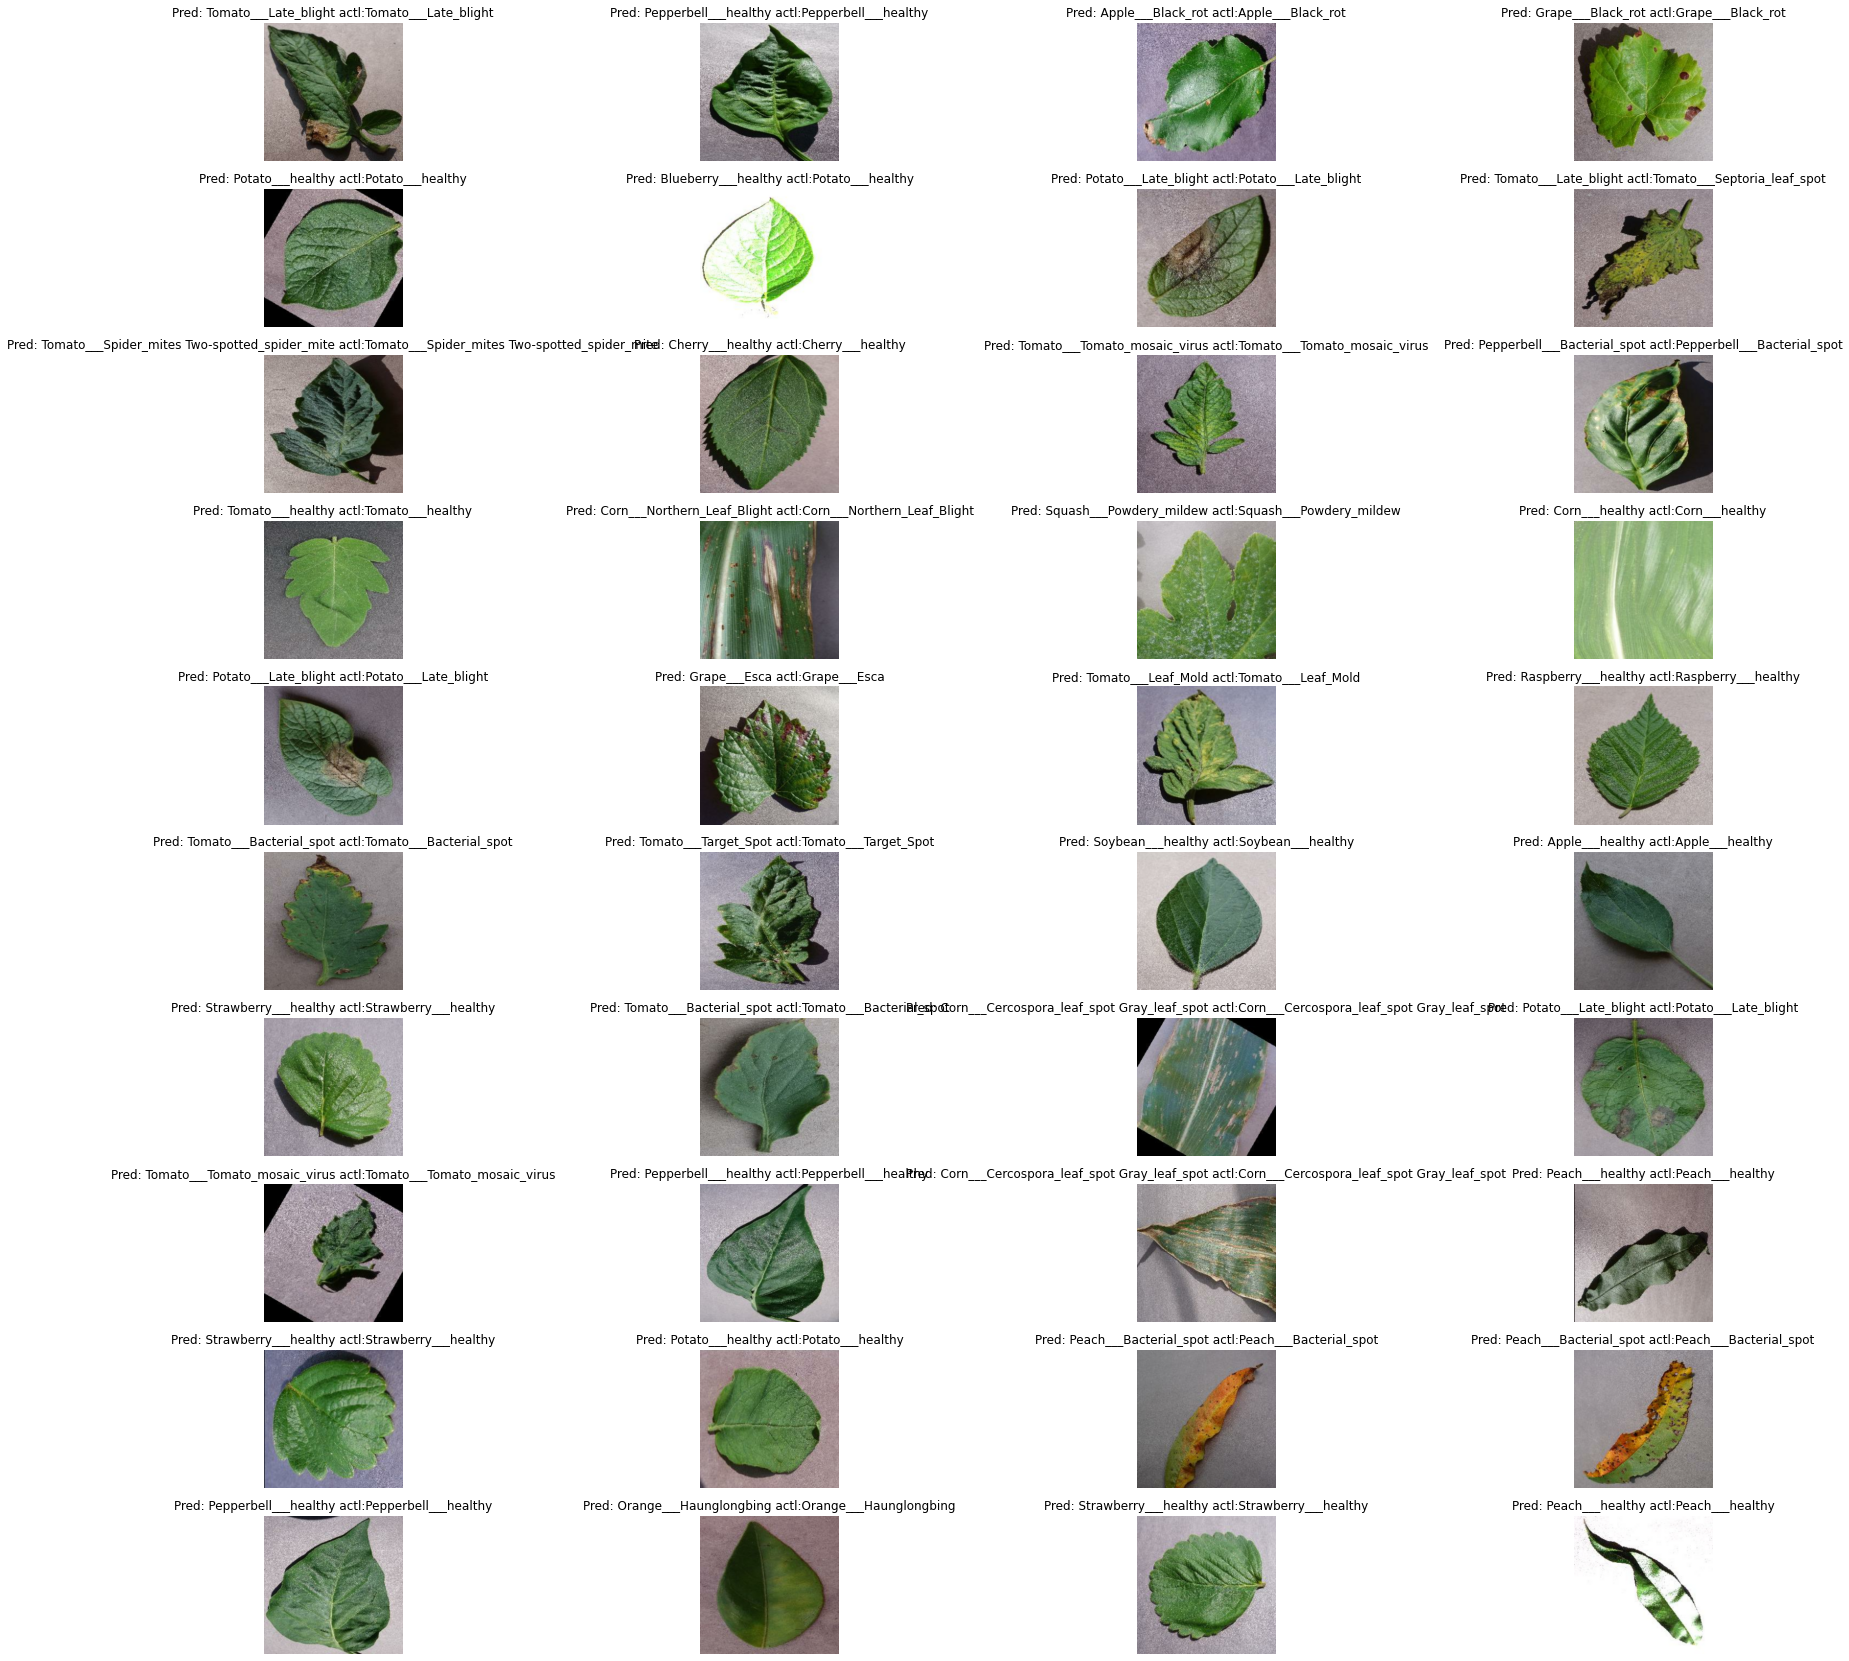

In [70]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = model0.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [78]:
# Check its architecture
model0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 29, 29, 128)      

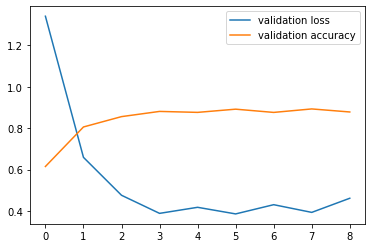

In [76]:
plt.plot(history0.history['val_loss'], label = 'validation loss')
plt.plot(history0.history['val_accuracy'], label = 'validation accuracy')
plt.legend();
plt.savefig('./app_pics/validation_accuracy.png', transparent=True, bbox_inches='tight')

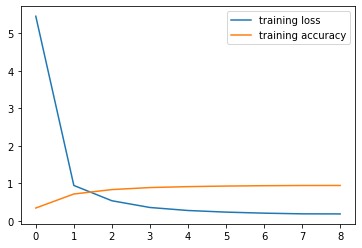

In [77]:
plt.plot(history0.history['loss'], label = 'training loss')
plt.plot(history0.history['accuracy'], label = 'training accuracy')
plt.legend();
plt.savefig('./app_pics/training_accuracy.png', transparent=True, bbox_inches='tight')

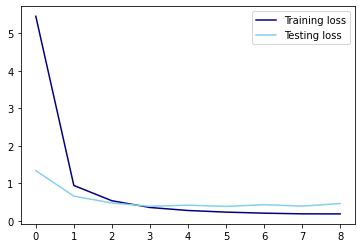

In [94]:
# Visualize loss
train_loss = history0.history['loss']
test_loss = history0.history['val_loss']

#plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

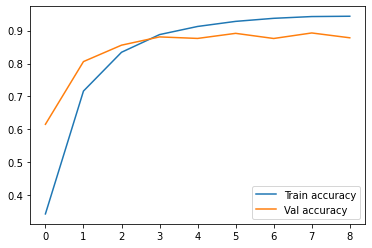

In [92]:
plt.plot(history0.history['accuracy'], label='Train accuracy')
plt.plot(history0.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [81]:
y_pred=model0.predict_classes(validation_ds)

C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [86]:
classes = training_ds.class_names
classes

['Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust_',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca',
 'Grape___Leaf_blight',
 'Grape___healthy',
 'Orange___Haunglongbing',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepperbell___Bacterial_spot',
 'Pepperbell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [88]:
con_mat = tf.math.confusion_matrix(labels=classes, predictions=y_pred).numpy()

UnimplementedError: Cast string to int64 is not supported [Op:Cast]

In [ ]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

con_mat_df_values = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)

In [ ]:
########################

In [ ]:
predictions = model0.predict(validation_ds)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [ ]:
true_classes = model0.classes
class_labels = list(model0.class_indices.keys())  

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

In [ ]:
########################

In [ ]:
#[None, 'micro', 'macro', 'weighted']
recall_score(validation_ds, model0.predict_classes(validation_ds), average = None)

In [90]:
accuracy_score(validation_ds, model0.predict_classes(validation_ds))

ValueError: Found input variables with inconsistent numbers of samples: [171, 17068]

In [ ]:
precision_score(validation_ds, model0.predict_classes(validation_ds), average = None)

In [98]:
model0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 29, 29, 128)      

In [96]:
modeltest = tf.keras.models.load_model('./model/leaf-model.h5') #UNCOMMENT TO LOAD MODEL

In [97]:
modeltest.summary()

Model: "leaf_disease_model_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________
